In [2]:
import json
import math
import matplotlib.pyplot as plt

In [3]:
with open("dangal_character_data.json") as f:
    character_data = json.load(f)

In [3]:
male_utterances = {}
female_utterances = {}

for key in character_data.keys():
    for sentence in character_data[key]['utterances']:
        for word in sentence.split():
            if character_data[key]['gender'] == 'M':
                try:
                    male_utterances[word.lower()] += 1
                except:
                    male_utterances[word.lower()] = 1
            else:
                try:
                    female_utterances[word.lower()] += 1
                except:
                    female_utterances[word.lower()] = 1

In [4]:
print("Unique Words said by Males: ", len(male_utterances))
print("Unique Words said by Females: ", len(female_utterances))

Unique Words said by Males:  2349
Unique Words said by Females:  2869


In [5]:
male_sorted_words = [(key, value) for key, value in sorted(male_utterances.items(), key=lambda item: item[1], reverse=True)]
female_sorted_words = [(key, value) for key, value in sorted(female_utterances.items(), key=lambda item: item[1], reverse=True)]

In [6]:
pronouns = ['tu', 'tum', 'aap', 'you']
male_pronouns = []
female_pronouns = []
combined_pronouns = []
for pronoun in pronouns:
    male_pronouns.append(male_utterances[pronoun])
    female_pronouns.append(female_utterances[pronoun])
    combined_pronouns.append(male_utterances[pronoun]+female_utterances[pronoun])

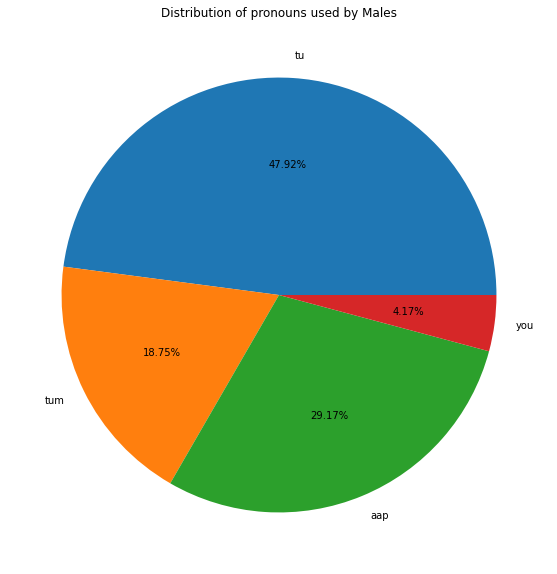

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(male_pronouns, labels=pronouns, autopct='%1.2f%%')
plt.title("Distribution of pronouns used by Males")
plt.show()

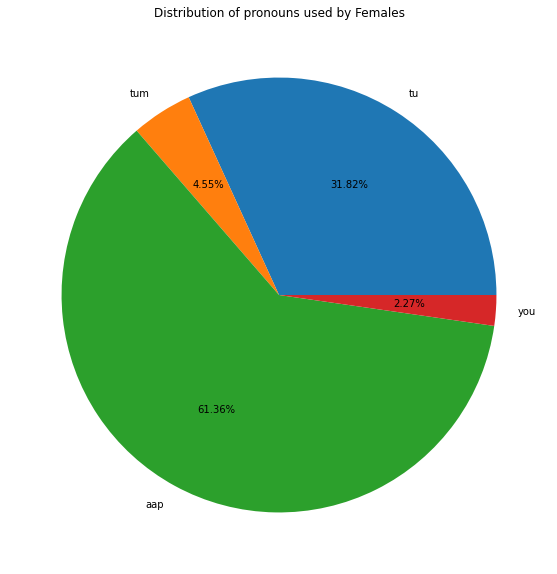

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(female_pronouns, labels=pronouns, autopct='%1.2f%%')
plt.title("Distribution of pronouns used by Females")
plt.show()

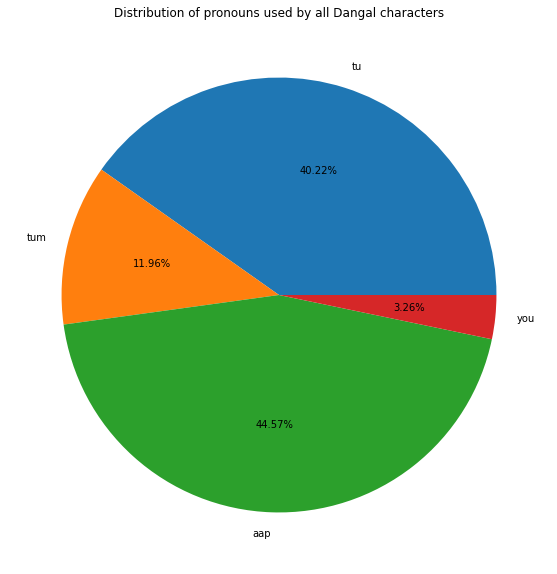

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(combined_pronouns, labels=pronouns, autopct='%1.2f%%')
plt.title("Distribution of pronouns used by all Dangal characters")
plt.show()

In [1]:
 ### Out of vocublary words
 import nltk

In [17]:
nltk.pos_tag(nltk.word_tokenize("tu kya kar rha bsdk"))

[('tu', 'NN'), ('kya', 'NN'), ('kar', 'NN'), ('rha', 'NN'), ('bsdk', 'NN')]

In [8]:
male_language_split = []
female_language_split = []

for key in character_data.keys():
    for sentence in character_data[key]['utterances']:
        count_total_words = 0
        count_english_words = 0
        for word in sentence.split():
            if nltk.pos_tag(word) != 'FW':
                count_english_words += 1
            count_total_words += 1
        
        if character_data[key]['gender'] == 'M':
            male_language_split.append((count_english_words, count_total_words))
        if character_data[key]['gender'] == 'F':
            female_language_split.append((count_english_words, count_total_words))


In [9]:
male_global_words = 0
female_global_words = 0
male_english_words = 0
female_english_words = 0

for english, all_words in male_language_split:
    male_english_words += english
    male_global_words += all_words
for english, all_words in female_language_split:
    female_english_words += english
    female_global_words += all_words

In [10]:
print(male_global_words)
print(male_english_words)
print(f"Males english use %: {round(male_english_words/male_global_words, 3)}")
print(f"Females english use %: {round(female_english_words/female_global_words, 3)}")

6417
6417
Males english use %: 1.0
Females english use %: 1.0
